## CSCI E-89 Deep Learning
### Lecture 01 Introduction to AI, ML & DL
## A Simple Example
#### 09/06/2024


### Setup TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [2]:
!uv pip install matplotlib

Using Python 3.13.4 environment at: /Users/alfred.okoronkwo/Projects/hues_programs/csie_89/.venv
Audited 1 package in 13ms


In [3]:
# Auxiliary libraries
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#### Load a dataset

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Experiment 2

### Repeat Experiment with 10,000 samples from the Training Set

In [5]:
x_train_exp2 = x_train[:10000]
y_train_exp2 = y_train[:10000]

In [6]:
print(x_train_exp2.shape, y_train_exp2.shape)

(10000, 28, 28) (10000,)


In [7]:
y_train_exp2

array([5, 0, 4, ..., 6, 9, 7], shape=(10000,), dtype=uint8)

#### Inspect an image

3


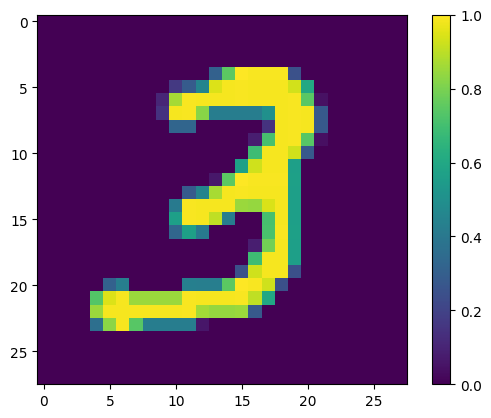

In [8]:
index = 107
print(y_train_exp2[index])
plt.figure()
plt.imshow(x_train_exp2[index])
plt.colorbar()
plt.grid(False)
plt.show()

#### Build a machine learning model

In [9]:
model_exp2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [10]:
predictions_exp2 = model_exp2(x_train_exp2[:1]).numpy()
predictions_exp2

array([[ 0.19978824,  0.67110467, -0.2292991 ,  0.10454257, -0.16163248,
        -0.09556929,  0.18163121, -0.23993933,  0.32693905, -0.33351016]],
      dtype=float32)

In [11]:
tf.nn.softmax(predictions_exp2).numpy()

array([[0.11170965, 0.17897023, 0.07273449, 0.10156077, 0.07782653,
        0.08314162, 0.10969964, 0.07196468, 0.12685616, 0.06553634]],
      dtype=float32)

In [12]:
loss_fn_exp2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
loss_fn_exp2(y_train_exp2[:1], predictions_exp2).numpy()

np.float32(2.4872098)

In [14]:
model_exp2.compile(optimizer='adam', loss=loss_fn_exp2, metrics=['accuracy'])

### Train and Evaluate the Model

In [15]:
model_exp2.fit(x_train_exp2, y_train_exp2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.8355 - loss: 0.5773


In [16]:
model_exp2.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 491us/step - accuracy: 0.9173 - loss: 0.3000


[0.3000411093235016, 0.9172999858856201]

In [17]:
x_train_exp2_predictions = model_exp2.predict(x_train_exp2)
exp2_predicted_digit = np.argmax(x_train_exp2_predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


The image classifier is now trained to ~98% accuracy on the reduced dataset. 

### Print 200 Samples of the Predictions

In [19]:
# To manage space we will print only a 200 predicted digits
# The format will be (true label, predicted label)

# Print labels and the predicted digits
col_headers = ["(y, p)" for _ in range(10)]
header_line = ["------" for _ in range(10)]
print("y: true label, p: predicted digit")
print()

# Print table headers
print(" | " + " | ".join(col_headers) + " | ")
print(" | " + " | ".join(header_line) + " | ")

# Print pairs of the true labels and corresponding predicted outcomes in the same tabular format
pairs = [f"({y_train_exp2[idx]}, {exp2_predicted_digit[idx]})" for idx in range(200)]
for i in range(0, len(pairs), 10):
    print(" | " + " | ".join(pairs[i:i+10]) + " | ")


y: true label, p: predicted digit

 | (y, p) | (y, p) | (y, p) | (y, p) | (y, p) | (y, p) | (y, p) | (y, p) | (y, p) | (y, p) | 
 | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | 
 | (5, 5) | (0, 0) | (4, 4) | (1, 1) | (9, 9) | (2, 2) | (1, 1) | (3, 3) | (1, 1) | (4, 4) | 
 | (3, 3) | (5, 5) | (3, 3) | (6, 6) | (1, 1) | (7, 7) | (2, 2) | (8, 8) | (6, 6) | (9, 9) | 
 | (4, 4) | (0, 0) | (9, 9) | (1, 1) | (1, 2) | (2, 2) | (4, 4) | (3, 3) | (2, 7) | (7, 7) | 
 | (3, 3) | (8, 8) | (6, 6) | (9, 7) | (0, 0) | (5, 5) | (6, 6) | (0, 0) | (7, 7) | (6, 6) | 
 | (1, 1) | (8, 8) | (7, 7) | (9, 9) | (3, 3) | (9, 9) | (8, 8) | (5, 5) | (9, 8) | (3, 3) | 
 | (3, 3) | (0, 0) | (7, 7) | (4, 4) | (9, 9) | (8, 8) | (0, 0) | (9, 9) | (4, 4) | (1, 1) | 
 | (4, 4) | (4, 4) | (6, 6) | (0, 0) | (4, 4) | (5, 5) | (6, 6) | (1, 1) | (0, 0) | (0, 0) | 
 | (1, 2) | (7, 7) | (1, 1) | (6, 6) | (3, 3) | (0, 0) | (2, 2) | (1, 1) | (1, 1) | (7, 7) | 
 | (9, 8) | (0, 0) | (2, 

#### Plot Samples of Predicted Images

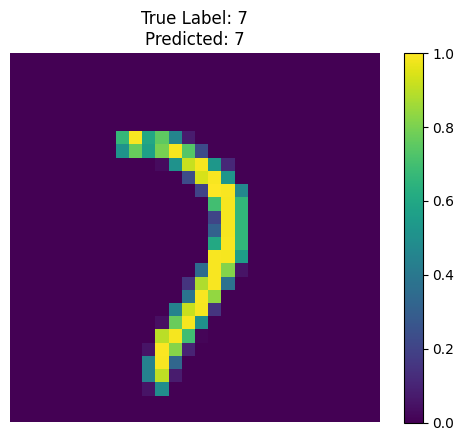

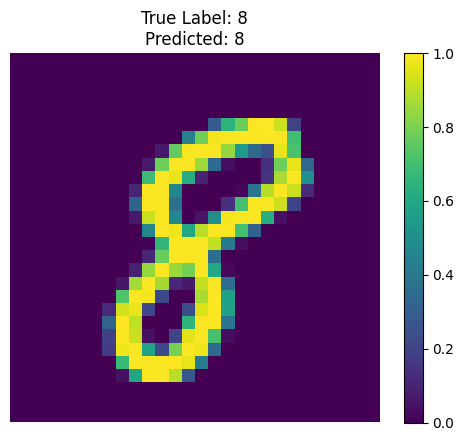

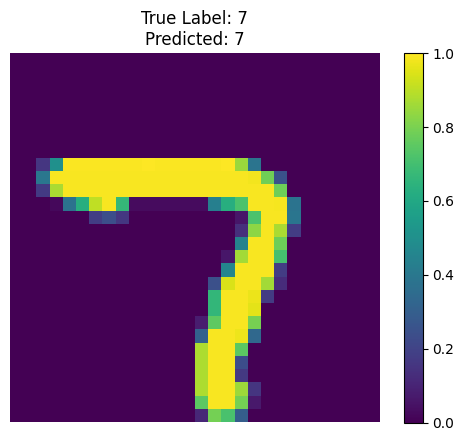

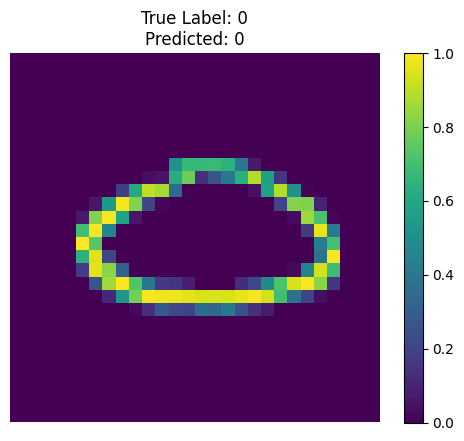

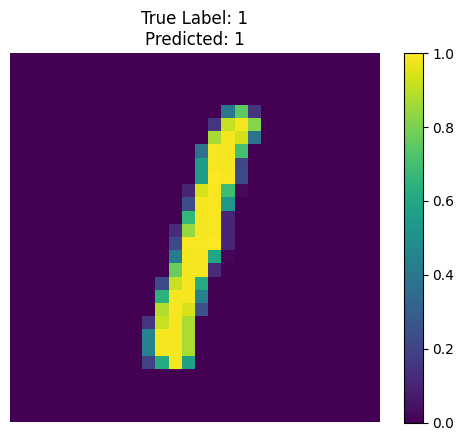

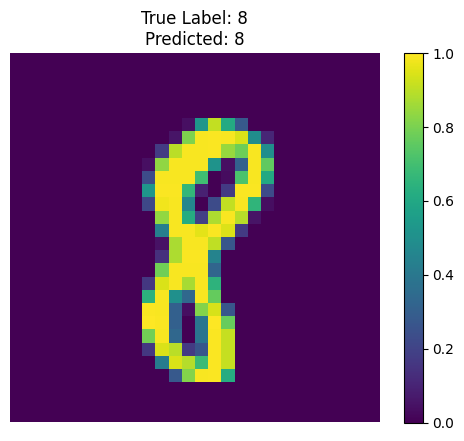

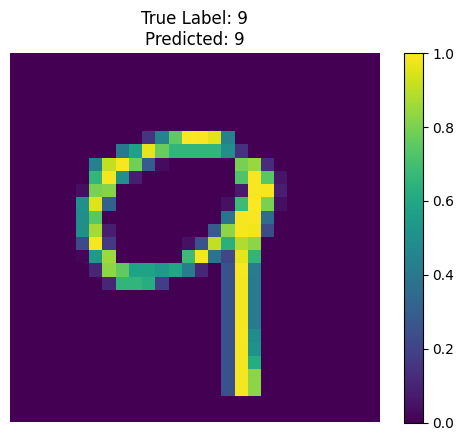

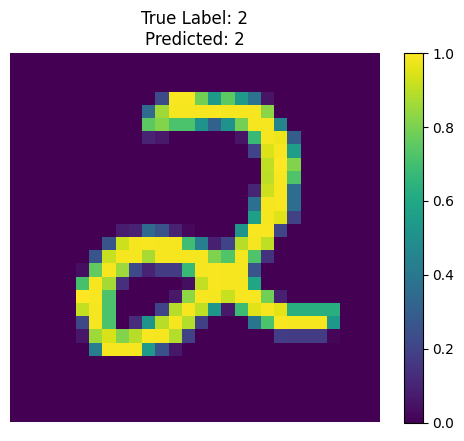

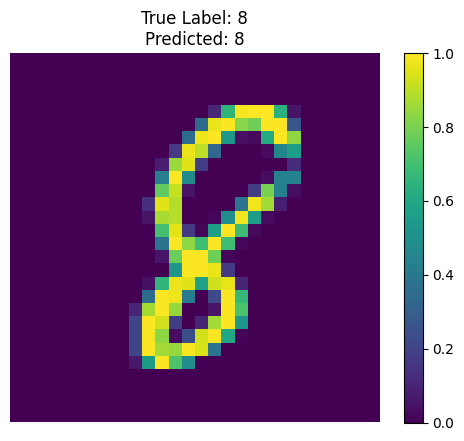

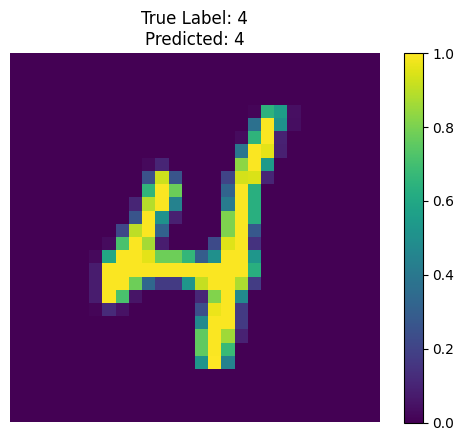

In [20]:
# Print images of 10 random predictions
indexes_print = np.random.choice(x_train_exp2.shape[0], size=10, replace=False)
for index in indexes_print:
    plt.figure()
    plt.imshow(x_train_exp2[index])
    plt.title(f"True Label: {y_train_exp2[index]}\nPredicted: {exp2_predicted_digit[index]}")
    plt.axis("off")
    plt.colorbar()
    plt.grid(False)
    plt.show()